In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



câu a)

In [ ]:
print("Lý Thanh Nguyên - 6351071050")
iris = load_iris()
X_original = iris.data
y = iris.target


Lý Thanh Nguyên - 6351071050


câu b)

In [ ]:
print("Lý Thanh Nguyên - 6351071050")

print("Tên các thuộc tính (Feature names):", iris.feature_names)
print("Tên các lớp (Target names):", iris.target_names)

# In số lượng mẫu, số lượng thuộc tính
print(f"Số lượng mẫu: {X_original.shape[0]}")
print(f"Số lượng thuộc tính: {X_original.shape[1]}")

# In 5 mẫu dữ liệu đầu tiên
print("\n5 mẫu dữ liệu đầu tiên (X):\n", X_original[:5])
print("5 nhãn đầu tiên (y):\n", y[:5])

# Thống kê mô tả
df = pd.DataFrame(X_original, columns=iris.feature_names)
print("\nThống kê mô tả (Describe):")
print(df.describe())
print("\n")



Lý Thanh Nguyên - 6351071050
Tên các thuộc tính (Feature names): ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Tên các lớp (Target names): ['setosa' 'versicolor' 'virginica']
Số lượng mẫu: 150
Số lượng thuộc tính: 4

5 mẫu dữ liệu đầu tiên (X):
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
5 nhãn đầu tiên (y):
 [0 0 0 0 0]

Thống kê mô tả (Describe):
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400

câu c)

In [ ]:
print("Lý Thanh Nguyên - 6351071050")

max_values = X_original.max(axis=0)
X_normalized = X_original / max_values

print("5 mẫu sau khi chuẩn hóa:\n", X_normalized[:5])
print("\n")



Lý Thanh Nguyên - 6351071050
5 mẫu sau khi chuẩn hóa:
 [[0.64556962 0.79545455 0.20289855 0.08      ]
 [0.62025316 0.68181818 0.20289855 0.08      ]
 [0.59493671 0.72727273 0.1884058  0.08      ]
 [0.58227848 0.70454545 0.2173913  0.08      ]
 [0.63291139 0.81818182 0.20289855 0.08      ]]




câu d)

In [ ]:
print("Lý Thanh Nguyên - 6351071050")

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape} ---\n")



Lý Thanh Nguyên - 6351071050
Train size: (120, 4), Test size: (30, 4) ---



câu e)

Lý Thanh Nguyên - 6351071050
========== Decision Tree ==========
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



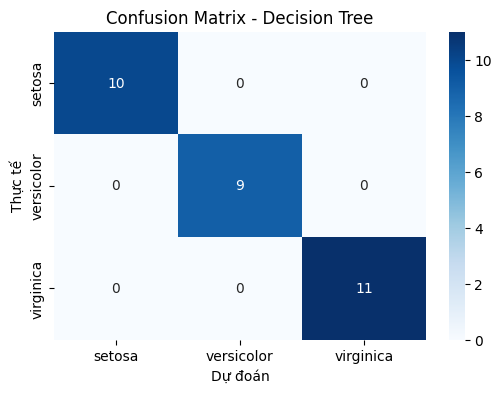

In [ ]:
def train_and_evaluate(model, model_name):
    print(f"========== {model_name} ==========")
    # Huấn luyện
    model.fit(X_train, y_train)

    # Dự đoán
    y_pred = model.predict(X_test)

    # Tính Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")

    # Precision, Recall, F1-score
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names,
                yticklabels=iris.target_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Thực tế')
    plt.xlabel('Dự đoán')
    plt.show()

    return model


print("Lý Thanh Nguyên - 6351071050")

dt_model = DecisionTreeClassifier(random_state=42)
dt_model = train_and_evaluate(dt_model, "Decision Tree")



câu f)

Lý Thanh Nguyên - 6351071050
========== Naïve Bayes ==========
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



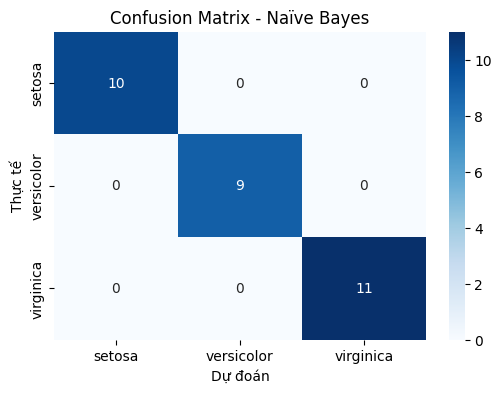

In [ ]:
print("Lý Thanh Nguyên - 6351071050")

nb_model = GaussianNB()
nb_model = train_and_evaluate(nb_model, "Naïve Bayes")



câu g)

Lý Thanh Nguyên - 6351071050
========== K Nearest Neighbors ==========
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



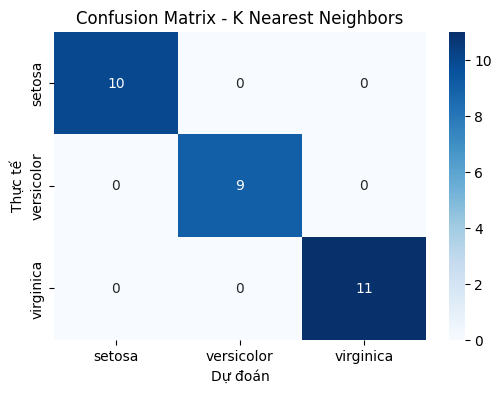

In [ ]:
print("Lý Thanh Nguyên - 6351071050")

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model = train_and_evaluate(knn_model, "K Nearest Neighbors")



câu h)

========== Neural Network ==========
Đang huấn luyện Neural Network...
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0632 - loss: 1.1425
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5275 - loss: 1.0548
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6499 - loss: 0.9987
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9146 - loss: 0.8919
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9352 - loss: 0.7643
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8932 - loss: 0.6348
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8804 - loss: 0.5385
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9366 - loss: 0.4300
Epoch 9/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9517 - loss: 0.4133
Epoch 10/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9670 - loss: 0.3684
Epoch 11/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9301 - loss: 0.3126
Epoch 12/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

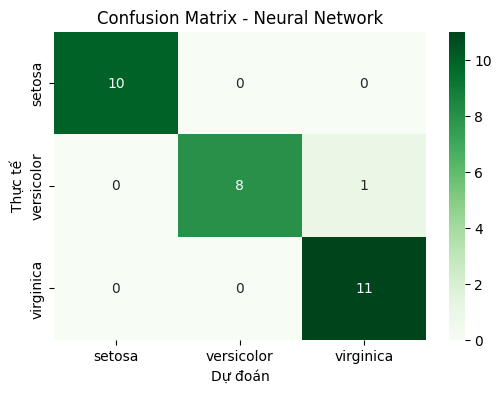

In [ ]:

print("========== Neural Network ==========")
# Xây dựng mô hình
model_nn = Sequential()

# Hidden layer 1: 10 neurons, Relu, input_shape=4
model_nn.add(Dense(10, activation='relu', input_shape=(4,)))

# Hidden layer 2: 20 neurons, Relu
model_nn.add(Dense(20, activation='relu'))

# Output layer: 3 classes (Iris), Softmax
model_nn.add(Dense(3, activation='softmax'))

# Biên dịch mô hình
model_nn.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Huấn luyện mô hình
# batch_size=1, epochs=100, verbose=1
print("Đang huấn luyện Neural Network...")
history = model_nn.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

# Dự đoán trên tập test
# predict trả về xác suất, dùng argmax để lấy class có xác suất cao nhất
y_pred_nn_prob = model_nn.predict(X_test)
y_pred_nn = np.argmax(y_pred_nn_prob, axis=1)

# Đánh giá Neural Network
acc_nn = accuracy_score(y_test, y_pred_nn)
print(f"\nAccuracy Neural Network: {acc_nn:.4f}")
print("Lý Thanh Nguyên - 6351071050")

print("\nClassification Report (Neural Network):")
print(classification_report(y_test, y_pred_nn, target_names=iris.target_names))

# Confusion Matrix Heatmap Neural Network
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Greens',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix - Neural Network')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()



câu i)

In [ ]:
print("Lý Thanh Nguyên - 6351071050")


new_samples = np.array([
    [6.2, 2.9, 4.3, 1.3],
    [5.1, 3.5, 1.4, 0.2],
    [7.3, 2.8, 6.4, 2.1]
])

# Chia cho max_values đã tính ở câu c
new_samples_norm = new_samples / max_values

print("Dữ liệu mới (đã chuẩn hóa):\n", new_samples_norm)

# Dự đoán với Decision Tree
pred_dt = dt_model.predict(new_samples_norm)
# Dự đoán với Naive Bayes
pred_nb = nb_model.predict(new_samples_norm)
# Dự đoán với KNN
pred_knn = knn_model.predict(new_samples_norm)
# Dự đoán với Neural Network
pred_nn = np.argmax(model_nn.predict(new_samples_norm), axis=1)

# Hàm chuyển đổi số thành tên loài hoa
def get_names(predictions):
    return [iris.target_names[p] for p in predictions]

print("\nKẾT QUẢ DỰ ĐOÁN:")
print(f"Decision Tree: {get_names(pred_dt)}")
print(f"Naïve Bayes:   {get_names(pred_nb)}")
print(f"KNN:           {get_names(pred_knn)}")
print(f"Neural Net:    {get_names(pred_nn)}")



Lý Thanh Nguyên - 6351071050
Dữ liệu mới (đã chuẩn hóa):
 [[0.78481013 0.65909091 0.62318841 0.52      ]
 [0.64556962 0.79545455 0.20289855 0.08      ]
 [0.92405063 0.63636364 0.92753623 0.84      ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

KẾT QUẢ DỰ ĐOÁN:
Decision Tree: [np.str_('versicolor'), np.str_('setosa'), np.str_('virginica')]
Naïve Bayes:   [np.str_('versicolor'), np.str_('setosa'), np.str_('virginica')]
KNN:           [np.str_('versicolor'), np.str_('setosa'), np.str_('virginica')]
Neural Net:    [np.str_('versicolor'), np.str_('setosa'), np.str_('virginica')]


câu j)

1. Hiệu suất chung:
   - Với bộ dữ liệu Iris (khá nhỏ và đơn giản, các lớp phân tách khá rõ), cả 4 mô hình thường cho kết quả rất cao (Accuracy thường > 90% hoặc đạt 100%).
   - Decision Tree, Naïve Bayes và KNN thường đạt kết quả rất tốt ngay lập tức mà không cần tinh chỉnh nhiều.

2. So sánh cụ thể:
   - Decision Tree: Dễ giải thích, chạy nhanh, nhưng dễ bị overfitting nếu không giới hạn độ sâu (tuy nhiên với Iris thì không đáng ngại).
   - Naïve Bayes: Hoạt động rất tốt với dữ liệu liên tục tuân theo phân phối chuẩn (Gaussian), Iris thỏa mãn điều này nên kết quả thường cao.
   - KNN: Đơn giản, hiệu quả nhưng tốc độ dự đoán chậm nếu dữ liệu lớn (với Iris thì rất nhanh).
   - Neural Network:
     + Cấu trúc mạng trong bài (2 hidden layers) là khá phức tạp so với độ đơn giản của dữ liệu Iris.
     + Việc train với batch_size=1 (Stochastic Gradient Descent) giúp mô hình cập nhật trọng số liên tục nhưng làm thời gian train lâu hơn.
     + Kết quả thường tương đương các mô hình trên, nhưng cần nhiều tài nguyên tính toán hơn.

3. Kết luận:
   - Với bài toán đơn giản như Iris, các thuật toán truyền thống (KNN, Naïve Bayes) là lựa chọn tối ưu về mặt chi phí tính toán và độ phức tạp.
   - Neural Network phù hợp hơn cho các bài toán phức tạp, dữ liệu lớn và phi tuyến tính cao.